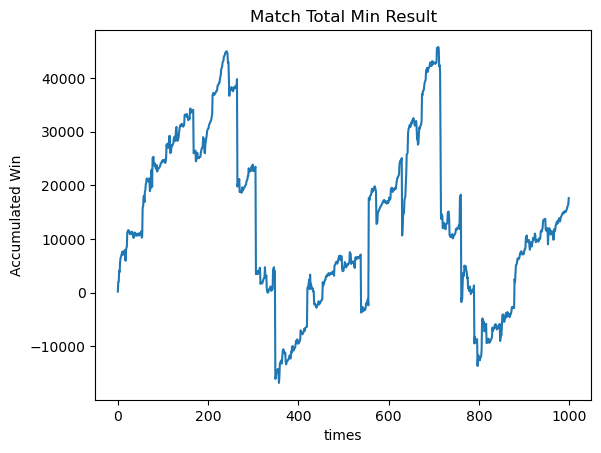

In [18]:
import matplotlib.pyplot as plt

file_path = '../assets/slumbot/backup/record-1000-2.txt'

xs, ys = [], []
with open(file_path, "r") as file:
	for idx, line in enumerate(file):
		xs.append(idx)
		ys.append(int(line.split(' ')[10][:-1]))

plt.title('Match Total Min Result')
plt.plot(xs, ys)
plt.xlabel('times')
plt.ylabel('Accumulated Win')
plt.show()